In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6e3cd8c3de243459f76b8ea2354ac568


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | kaliganj
Processing Record 4 of Set 1 | aktau
Processing Record 5 of Set 1 | oyem
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | clyde river
Processing Record 8 of Set 1 | rancho palos verdes
Processing Record 9 of Set 1 | mentok
City not found. Skipping...
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | mar del plata
Processing Record 14 of Set 1 | abu dhabi
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | kemin
Processing Record 17 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 

Processing Record 38 of Set 4 | puerto ayora
Processing Record 39 of Set 4 | coetupo
City not found. Skipping...
Processing Record 40 of Set 4 | saint-pierre
Processing Record 41 of Set 4 | new bern
Processing Record 42 of Set 4 | carndonagh
Processing Record 43 of Set 4 | pacific grove
Processing Record 44 of Set 4 | baisha
Processing Record 45 of Set 4 | ponta do sol
Processing Record 46 of Set 4 | meadow lake
Processing Record 47 of Set 4 | tuusula
Processing Record 48 of Set 4 | dikson
Processing Record 49 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 50 of Set 4 | albert lea
Processing Record 1 of Set 5 | leh
Processing Record 2 of Set 5 | meulaboh
Processing Record 3 of Set 5 | safonovo
Processing Record 4 of Set 5 | edson
Processing Record 5 of Set 5 | torbay
Processing Record 6 of Set 5 | wanaka
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | zyryanka
Processing Record 9 of Set 5 | biak
Processing Record 10 of Set 5 | tuggurt
City not

Processing Record 27 of Set 8 | bida
Processing Record 28 of Set 8 | eisenerz
Processing Record 29 of Set 8 | mount isa
Processing Record 30 of Set 8 | mende
Processing Record 31 of Set 8 | keti bandar
Processing Record 32 of Set 8 | okahandja
Processing Record 33 of Set 8 | dakar
Processing Record 34 of Set 8 | mindelo
Processing Record 35 of Set 8 | niagara falls
Processing Record 36 of Set 8 | nanortalik
Processing Record 37 of Set 8 | gwadar
Processing Record 38 of Set 8 | cabedelo
Processing Record 39 of Set 8 | abu samrah
Processing Record 40 of Set 8 | hoi an
Processing Record 41 of Set 8 | gannan
Processing Record 42 of Set 8 | fortuna
Processing Record 43 of Set 8 | ghorawal
Processing Record 44 of Set 8 | arlit
Processing Record 45 of Set 8 | samarai
Processing Record 46 of Set 8 | mankono
Processing Record 47 of Set 8 | palaiokhora
City not found. Skipping...
Processing Record 48 of Set 8 | barra do corda
Processing Record 49 of Set 8 | nieuw amsterdam
Processing Record 50 o

Processing Record 19 of Set 12 | ati
Processing Record 20 of Set 12 | flinders
Processing Record 21 of Set 12 | pushkino
Processing Record 22 of Set 12 | kailua
Processing Record 23 of Set 12 | mancheral
Processing Record 24 of Set 12 | sarangani
Processing Record 25 of Set 12 | naze
Processing Record 26 of Set 12 | babstovo
Processing Record 27 of Set 12 | shulin
Processing Record 28 of Set 12 | brandfort
Processing Record 29 of Set 12 | xining
Processing Record 30 of Set 12 | devrek
Processing Record 31 of Set 12 | nemuro
Processing Record 32 of Set 12 | laguna
Processing Record 33 of Set 12 | tebingtinggi
Processing Record 34 of Set 12 | japura
Processing Record 35 of Set 12 | maceio
Processing Record 36 of Set 12 | yaan
Processing Record 37 of Set 12 | portland
Processing Record 38 of Set 12 | bosanski samac
Processing Record 39 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 40 of Set 12 | warragul
Processing Record 41 of Set 12 | tuy hoa
Processing Record 42 

In [8]:
len(city_data)

586

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,86.00,79,18,4.27,US,2020-08-24 23:00:58
1,Mataura,-46.19,168.86,46.99,67,97,15.01,NZ,2020-08-24 23:02:47
2,Kaliganj,23.41,89.14,79.43,89,94,5.84,BD,2020-08-24 23:02:47
3,Aktau,43.65,51.20,60.80,72,45,4.47,KZ,2020-08-24 23:02:47
4,Oyem,1.60,11.58,66.83,99,100,2.86,GA,2020-08-24 23:02:48
5,Bluff,-46.60,168.33,46.99,67,87,15.01,NZ,2020-08-24 23:02:48
6,Clyde River,70.47,-68.59,41.70,85,97,8.99,CA,2020-08-24 23:02:48
7,Rancho Palos Verdes,33.74,-118.39,77.00,83,40,19.46,US,2020-08-24 23:00:46
8,New Norfolk,-42.78,147.06,46.00,83,30,5.01,AU,2020-08-24 23:02:48
9,Talnakh,69.49,88.40,55.40,87,66,8.95,RU,2020-08-24 23:02:23


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-08-24 23:00:58,42.60,-73.97,86.00,79,18,4.27
1,Mataura,NZ,2020-08-24 23:02:47,-46.19,168.86,46.99,67,97,15.01
2,Kaliganj,BD,2020-08-24 23:02:47,23.41,89.14,79.43,89,94,5.84
3,Aktau,KZ,2020-08-24 23:02:47,43.65,51.20,60.80,72,45,4.47
4,Oyem,GA,2020-08-24 23:02:48,1.60,11.58,66.83,99,100,2.86


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

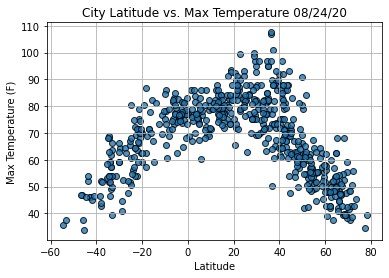

In [14]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

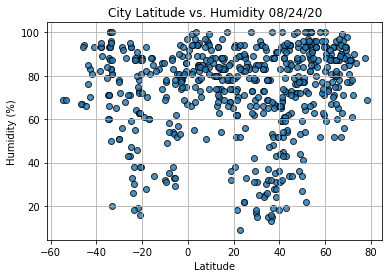

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

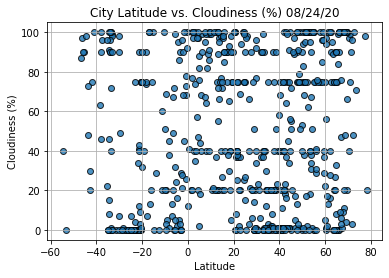

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

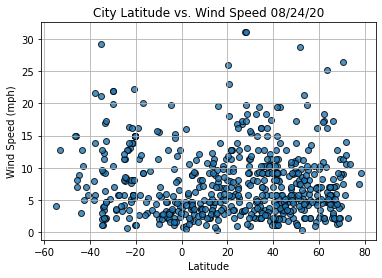

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()